In [1]:


from sklearn.model_selection import cross_val_predict, cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import sys
sys.path.append("/Users/derekdewald/Documents/Python/Github_Repo/d_py_functions")

from DataSets import iris_df

In [3]:
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 

# Engineering

# Data Processing


In [ ]:
# Stochastic Gradient Descent - Sequential, iterative process. Good for Online, Handles Large Well.

In [ ]:
from DataSets import MNIST_SKLEARN
X,y = MNIST_SKLEARN(False,True)

df = pd.concat([pd.DataFrame(X),pd.DataFrame(y,columns=['Target'])],axis=1)


In [29]:
!conda install mlflow -y

Retrieving noticesdone
Channels:
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: \ 

## Package Plan ##

  environment location: /Users/derekdewald/anaconda3/envs/D2

  added / updated specs:
    - mlflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alembic-1.15.2             |  py311hca03da5_0         433 KB
    certifi-2025.4.26          |  py311hca03da5_0         158 KB
    libcurl-8.12.1             |       hde089ae_0         416 KB
    markdown-3.8               |  py311hca03da5_0         199 KB
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  aiohappyeyeballs   pkgs/main/osx-arm64::aiohappyeyeballs-2.4.4-py311hca03da5_0 
  aiohttp            pkgs/main/osx-arm64::aiohttp-3.11.10-py311h80987f9_0 
 

2025/05/05 22:35:50 INFO mlflow.tracking.fluent: Experiment with name 'MNIST_ML_Comparison' does not exist. Creating a new experiment.


NameError: name 'apply_scaling' is not defined

In [ ]:
def GeneratePrediction(model,X,y,cross_val=0,convert_to_binary=0):

    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=.2)

    y_train_is5 = (y_train ==5)
    y_test_is5 = (y_test ==5)

    model = model(random_state=42)

    fit_model = model.fit(X,y)
    
    if cross_val==0:
        pred = fit_model.predict(X)
    else:
        pred = cross_val_predict(fit_model, X, y, cv=5)

    y_df = pd.DataFrame(y,columns=['ACTUAL'])
    pred_df = pd.DataFrame(pred,columns=['PREDICTION'])
    
    if convert_to_binary==1:
        y_df    = y_df.astype(int)
        pred_df = pred_df.astype(int)
    
    final_df = pd.concat([pred_df,y_df],axis=1)

    return final_df 

In [12]:
model_dictionary = {'ModelName':{'Python_Model':"",
                                 'Important_Notes':"",
                                 'parameters':{}}
                   }

dataset:{'X_train_df':"",
         'y_train_df':"",
         'X_test_df':"",
         'y_test_df':"",
         'X_train_np':"",
         'y_train_np':"",
         'X_test_np':"",
         'y_test_np':""
        }

In [150]:
X_train_flag = X_train.reshape(len(X_train), -1)
sgd_model.fit(X_train_flag,y_train_is5)

SGDClassifier(random_state=42)

In [152]:


sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train,y_train_is5)
sgd_model.fit(X_train_flag,y_train_is5)


cross_val_score(sgd_model, X_train_flag, y_train_is5, cv=5)

y_pred1 = cross_val_predict(sgd_model, X_train_flag, y_train_is5, cv=5)
y_pred1

array([0.96580357, 0.97633929, 0.97366071, 0.97339286, 0.97357143])

In [176]:
result_summary

,True Positives,True Negatives,False Positives (I),False Negatives (II),Total Records,Correct Predictions,Incorrect Predictions,Actual Positives,Actual Negatives,Recall,Precision,F1,Accuracy,AUC
0,5040,50960,0,0,56000,56000,0,5040,50960,1.0,1.0,1.0,1.0,1.0


In [171]:


training = GeneratePrediction(SGDClassifier,X_train_flag,y_train_is5,convert_to_binary=1)
training['ACTUAL_INT'] = y_train
training1,result_summary, error_df=ClassificationMetrics(training)

In [167]:
error_df

,PREDICTION,ACTUAL,ACTUAL_INT,RESULT
96,0,1,5,False Negatives (II)
101,0,1,5,False Negatives (II)
112,0,1,5,False Negatives (II)
128,0,1,5,False Negatives (II)
317,0,1,5,False Negatives (II)
...,...,...,...,...
55811,0,1,5,False Negatives (II)
55876,0,1,5,False Negatives (II)
55943,0,1,5,False Negatives (II)
55959,0,1,5,False Negatives (II)


In [163]:
training1['RESULT'].value_counts()

RESULT
True Negatives          50655
True Positives           4127
False Negatives (II)      913
False Positives (I)       305
Name: count, dtype: int64

In [172]:
result_summary

,True Positives,True Negatives,False Positives (I),False Negatives (II),Total Records,Correct Predictions,Incorrect Predictions,Actual Positives,Actual Negatives,Recall,Precision,F1,Accuracy,AUC
0,4127,50655,305,913,56000,54782,1218,5040,50960,0.818849,0.931182,0.87141,0.97825,0.906432


In [164]:
result_summary

,True Positives,True Negatives,False Positives (I),False Negatives (II),Total Records,Correct Predictions,Incorrect Predictions,Actual Positives,Actual Negatives,Recall,Precision,F1,Accuracy,AUC
0,4127,50655,305,913,56000,54782,1218,5040,50960,0.818849,0.931182,0.87141,0.97825,0.906432


In [129]:
X_test_flat = X_test.reshape(len(X_test), -1)
y_pred = sgd_model.predict(X_test_flat)

final_df = pd.concat([pd.DataFrame(y_pred,columns=['PREDICTION']),pd.DataFrame(y_test_is5,columns=['ACTUAL']),pd.DataFrame(y_test,columns=["ACTUAL_VALUE"])],axis=1)
final_df['PREDICTION'] = final_df['PREDICTION'].astype(int)
final_df['ACTUAL'] = final_df['ACTUAL'].astype(int)
final_df.head()

,PREDICTION,ACTUAL,ACTUAL_VALUE
0,0,0,8
1,0,0,4
2,0,0,8
3,0,0,7
4,0,0,7


In [130]:
from sklearn.metrics import roc_auc_score

def ClassificationMetrics(df,
                          prediction='PREDICTION',
                          actual='ACTUAL',
                          new_column_name='RESULT'):
    '''
    Function
        
    
    Parameters
        
    
    Returns
            
    '''
    results_dict = {}
    
    condition = [(df[prediction]==1)&(df[actual]==df[prediction]),
                 (df[prediction]==0)&(df[actual]==df[prediction]),
                 (df[prediction]==1)&(df[actual]!=df[prediction]),
                 (df[prediction]==0)&(df[actual]!=df[prediction])]
    
    values = ['True Positives','True Negatives','False Positives (I)','False Negatives (II)']    
    df[new_column_name] = np.select(condition,values,default='Unclassified')

    results_dict['True Positives'] =       len(df[df['RESULT']=='True Positives'])
    results_dict['True Negatives'] =       len(df[df['RESULT']=='True Negatives'])
    results_dict['False Positives (I)'] =  len(df[df['RESULT']=='False Positives (I)'])
    results_dict['False Negatives (II)'] = len(df[df['RESULT']=='False Negatives (II)'])
    
    
    results_dict['Total Records'] = len(df)
    results_dict['Correct Predictions'] =   len(df[df['RESULT'].isin(['True Negatives','True Positives'])])
    results_dict['Incorrect Predictions'] = len(df[df['RESULT'].isin(['False Negatives (II)','False Positives (I)'])])
    results_dict['Actual Positives'] = len(df[df['RESULT'].isin(['False Negatives (II)','True Positives'])])
    results_dict['Actual Negatives'] = len(df[df['RESULT'].isin(['False Positives (I)','True Negatives'])])
    
    try:
        results_dict['Recall'] = results_dict['True Positives']/(results_dict['True Positives']+results_dict['False Negatives (II)'])     # How Many Positives were Actually Predicted
        results_dict['Precision']    = results_dict['True Positives']/(results_dict['True Positives']+results_dict['False Positives (I)']) # How Many Predictions were Correct
        results_dict['F1'] = 2*(results_dict['Precision']*results_dict['Recall'])/(results_dict['Precision']+results_dict['Recall'])  # Harmonic Mean 
        
    except:
        results_dict['Recall'] = 0
        results_dict['Precision'] = 0
        results_dict['F1'] = 0
        
    results_dict['Accuracy']  = results_dict['Correct Predictions']/results_dict['Total Records']     # How Correct your Model was overall
    results_dict['AUC']       = roc_auc_score(df[actual],df[prediction])

    result_summary = pd.DataFrame([results_dict.values()],columns=results_dict.keys())
    error_df = df[df[new_column_name].isin(['False Positives (I)','False Negatives (II)'])]

    return df,result_summary, error_df




In [117]:
final_df1.head()

,PREDICTION,ACTUAL,RESULT
0,0,0,True Negatives
1,0,0,True Negatives
2,0,0,True Negatives
3,0,0,True Negatives
4,0,0,True Negatives


In [119]:
result_summary

,True Positives,True Negatives,False Positives (I),False Negatives (II),Total Records,Correct Predictions,Incorrect Predictions,Actual Positives,Actual Negatives,Recall,Precision,F1,Accuracy,AUC
0,1031,12633,94,242,14000,13664,336,1273,12727,0.809898,0.916444,0.859883,0.976,0.901256


In [142]:
error_df

,PREDICTION,ACTUAL,ACTUAL_VALUE,RESULT
35,0,1,5,False Negatives (II)
65,0,1,5,False Negatives (II)
78,0,1,5,False Negatives (II)
100,1,0,3,False Positives (I)
102,1,0,0,False Positives (I)
...,...,...,...,...
13791,0,1,5,False Negatives (II)
13903,0,1,5,False Negatives (II)
13919,0,1,5,False Negatives (II)
13967,1,0,6,False Positives (I)


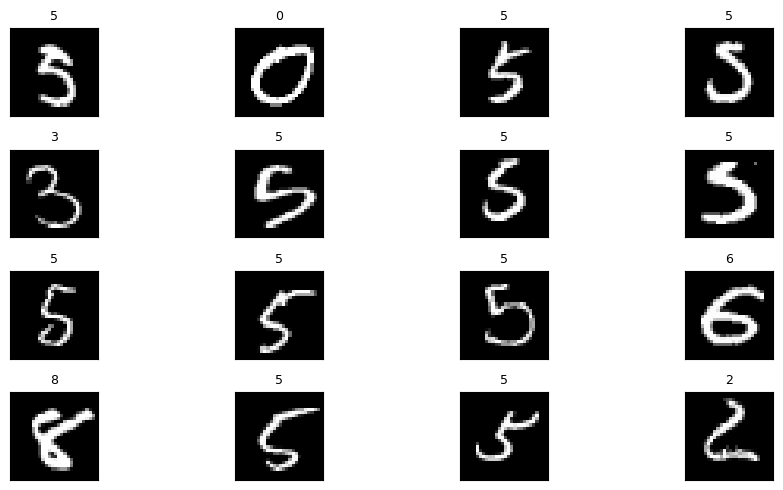

In [146]:
items = []

for num in error_df.reset_index()['index'].sample(16).tolist():
    items.append({'type':'image','data':X_test[num],'Title':y_test[num]})    

display_plot_grid(plot_mixed, items)

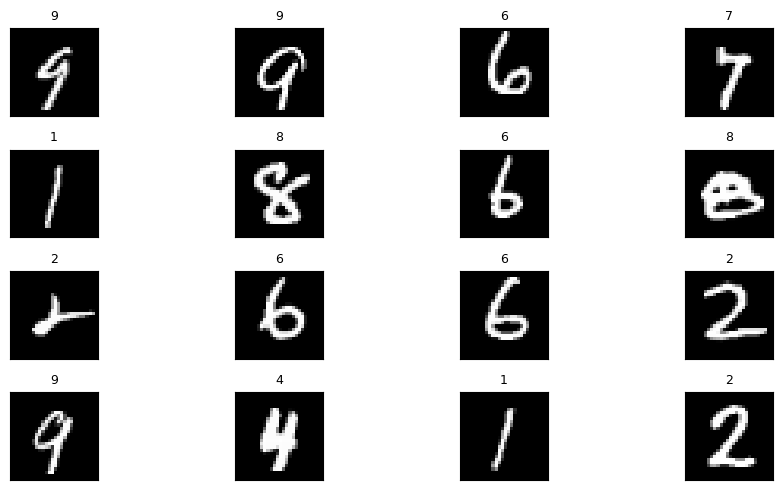

In [40]:
items = []

for record in range(0,16):
    num = np.random.randint(0,70000)
    items.append({'type':'image','data':X[num],'Title':y[num]})    

display_plot_grid(plot_mixed, items)

KeyError: 'Title'

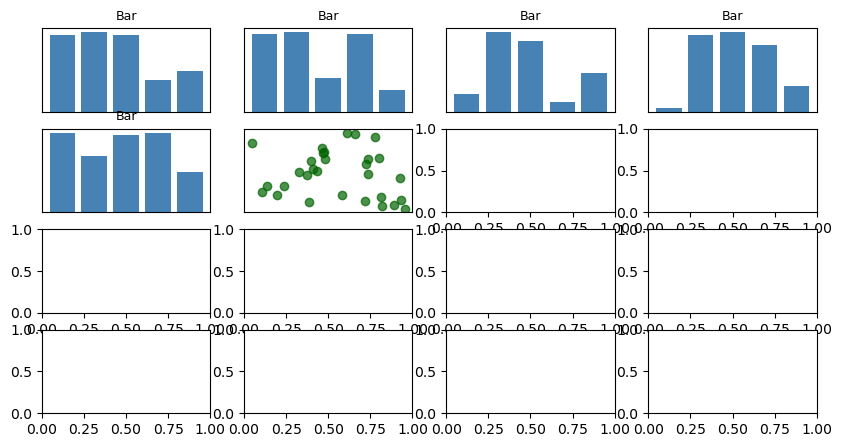

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import math

# === Step 1: Generate mixed items ===

items = []

# 5 bar charts
for _ in range(5):
    data = np.random.rand(5)
    items.append({'type': 'bar', 'data': data})

# 5 scatter plots
for _ in range(5):
    points = np.random.rand(30, 2)
    items.append({'type': 'scatter', 'data': points})

# 6 image plots (28x28 grayscale)
for _ in range(6):
    image = np.random.rand(28, 28)
    items.append({'type': 'image', 'data': image})

# === Step 2: Define plot function ===

def plot_mixed(ax, item):
    ax.clear()
    ax.set_xticks([])
    ax.set_yticks([])

    if item['type'] == 'bar':
        ax.bar(range(len(item['data'])), item['data'], color='steelblue')
        ax.set_title("Bar", fontsize=9)
    elif item['type'] == 'scatter':
        ax.scatter(item['data'][:, 0], item['data'][:, 1], alpha=0.7, color='darkgreen')
        ax.set_title(item['Title'], fontsize=9)
    elif item['type'] == 'image':
        ax.imshow(item['data'], cmap='gray')
        ax.set_title(item['Title'], fontsize=9)
    else:
        ax.text(0.5, 0.5, "Unknown", ha='center', va='center')

# === Step 3: Display grid ===

def display_plot_grid(plot_fn, items, cols=4, figsize=(10, 5)):
    num_items = len(items)
    rows = math.ceil(num_items / cols)

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < num_items:
            plot_fn(ax, items[i])
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# === Step 4: Plot ===

display_plot_grid(plot_mixed, items)


In [20]:
def display_plot_grid(plot_fn, data, num_plots=16, cols=4, figsize=(12, 8), titles=None):
    """
    Display a grid of subplots using a custom plotting function like plt.scatter or plt.bar.

    Parameters:
        plot_fn (callable): A function that accepts (ax, datum) and draws on the axis
        data (list-like): A list or array of data objects (e.g., points, histograms)
        num_plots (int): Number of subplots to draw
        cols (int): Number of columns in the grid
        figsize (tuple): Overall figure size
        titles (list or None): Optional list of titles for each subplot
    """
    rows = math.ceil(num_plots / cols)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i in range(rows * cols):
        ax = axes[i]
        ax.clear()
        if i < len(data):
            plot_fn(ax, data[i])
            if titles:
                ax.set_title(titles[i], fontsize=10)
        ax.axis('on' if titles else 'off')

    plt.tight_layout()
    plt.show()




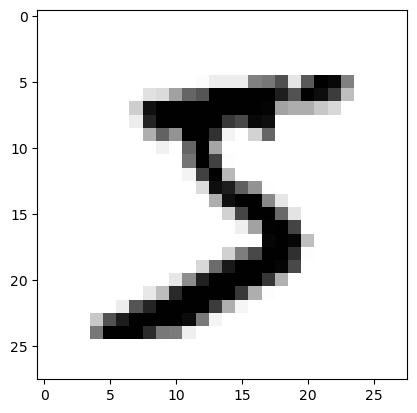

In [19]:
import matplotlib.pyplot as plt

def DisplayImage(df,images):


    


plt.imshow(X[0],cmap='binary')
display(
plt.show()

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

ModuleNotFoundError: No module named 'torchvision'

### Understanding Noise

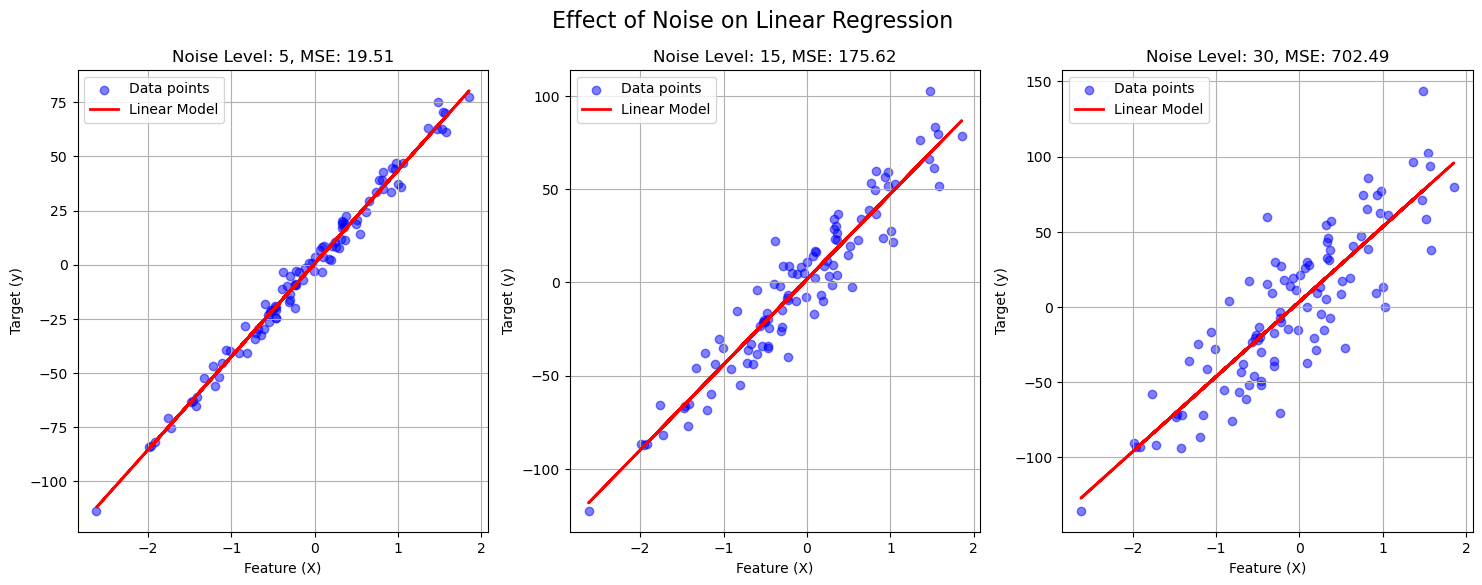

In [2]:
# Define noise levels
noise_levels = [5, 15, 30]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, noise in enumerate(noise_levels):
    # Generate synthetic regression data with different noise levels
    X, y = make_regression(n_samples=100, n_features=1, noise=noise, random_state=42)

    # Train a simple linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)

    # Plot the data and regression line
    axes[i].scatter(X, y, color="blue", alpha=0.5, label="Data points")
    axes[i].plot(X, y_pred, color="red", linewidth=2, label="Linear Model")
    axes[i].set_title(f"Noise Level: {noise}, MSE: {mse:.2f}")
    axes[i].set_xlabel("Feature (X)")
    axes[i].set_ylabel("Target (y)")
    axes[i].legend()
    axes[i].grid(True)

# Show the plots
plt.suptitle("Effect of Noise on Linear Regression", fontsize=16)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


# Use Polynomial Regression of degree 2
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
y_poly_pred = poly_model.predict(X)

# Plot Polynomial Regression
plt.scatter(X, y, color="blue", alpha=0.5, label="Data points")
plt.plot(X, y_poly_pred, color="green", linewidth=2, label="Polynomial Model (Degree 2)")
plt.title("Polynomial Regression (Degree 2) - Noise Level 30")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.grid(True)
plt.show()


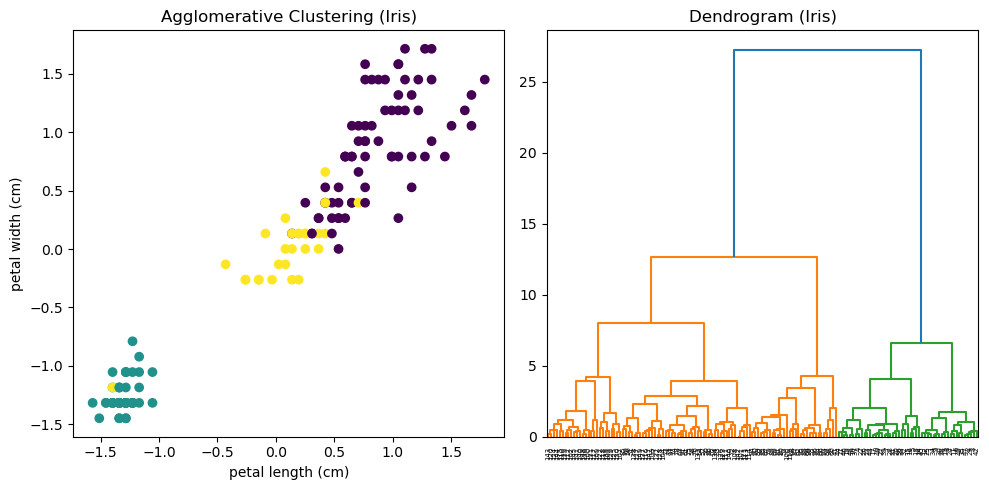

In [16]:
X = iris_df.drop('Target',axis=1).to_numpy()
X_scaled = StandardScaler().fit_transform(X)

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X_scaled)
feature_names = iris_df.drop('Target',axis=1).columns.tolist()

# 3. Plot the resulting clusters in 2D (using 2 features for simplicity)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=labels, cmap='viridis')
plt.title("Agglomerative Clustering (Iris)")
plt.xlabel(feature_names[2])  # petal length
plt.ylabel(feature_names[3])  # petal width

# 4. Create linkage matrix and plot dendrogram
linked = linkage(X_scaled, method='ward')

plt.subplot(1, 2, 2)
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Dendrogram (Iris)")
plt.tight_layout()
plt.show()